In [1]:
# read in binary data
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys, os
sys.path.append(os.environ['raco'])
from common import dotdict, g_univ
f = open("Model_S.pkl", "rb")
di = dotdict(pickle.load(f))
f.close()

In [2]:
di.msun

1.989e+33

In [3]:
# all right let's compute some diffusion coefficients

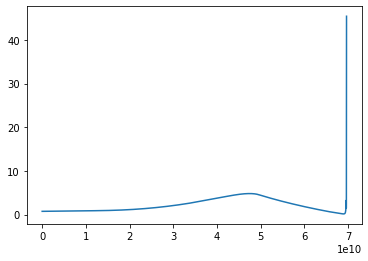

In [4]:
nu = 1.2e-16*di.tmp**(5/2)/di.rho
rr = di.rr
plt.plot(rr, nu)

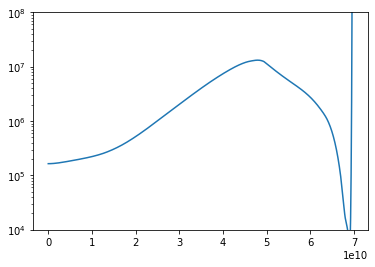

In [5]:
sig_sb = 5.6704e-5
kappa = 16*sig_sb*di.tmp**3/(3*di.opa*di.rho**2*di.cp)
plt.plot(rr, kappa)
plt.ylim(1e4, 1e8)
plt.yscale('log')

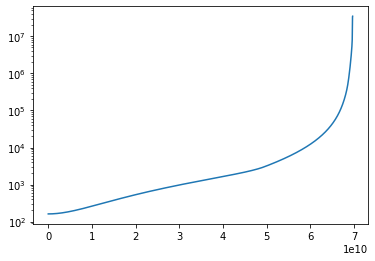

In [6]:
eta = 1e13*di.tmp**(-1.5)
plt.plot(rr, eta)
plt.yscale('log')

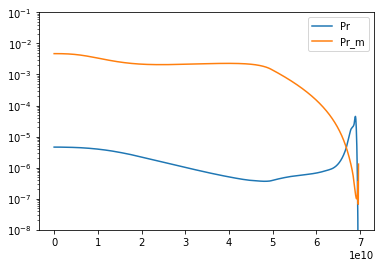

In [7]:
# plot Prandtl numbers
prm = nu/eta
pr = nu/kappa

plt.plot(rr, pr, label='Pr')
plt.plot(rr, prm, label='Pr_m')
plt.legend()
plt.ylim(1e-8, .1)
plt.yscale('log')

In [8]:
ircz = np.argmin(np.abs(rr-5e10))

In [9]:
print(nu[ircz])
print(eta[ircz])
print(kappa[ircz])

4.4287057595469195
3204.9554575211764
11314613.40845236


(0.0, 0.02)

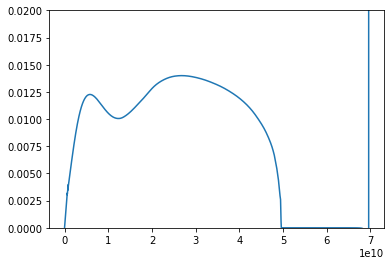

In [10]:
plt.plot(rr,di.dsdr)
plt.ylim(0, .02)

(0.0, 1e-05)

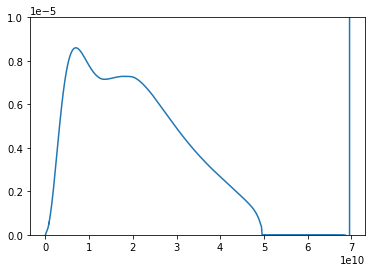

In [11]:
brunt2 = di.g/di.cp*di.dsdr
plt.plot(rr, brunt2)
plt.ylim(0,1e-5)

(0.001, 10)

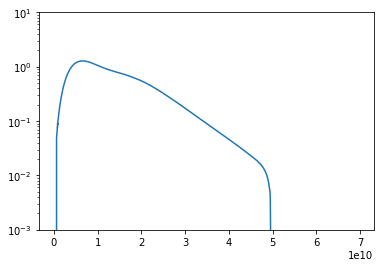

In [12]:
om = 2.7e-6
sig = (brunt2/4/om**2)*pr
plt.plot(rr,sig)
plt.yscale('log')
plt.ylim(1e-3, 10)

/home1/lmatilsk/miniconda3/envs/custom/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


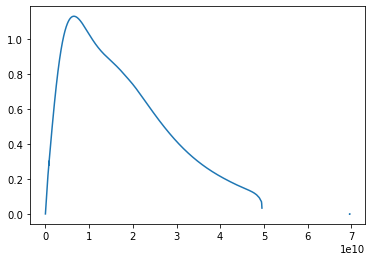

In [13]:
plt.plot(rr, np.sqrt(sig))

In [16]:
ir2 = np.argmin(np.abs(rr-4e10))
brunt2[ir2]/4/om**2

91435.40289567693